In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Cleansing

Data can be found in https://archive.ics.uci.edu/ml/datasets/heart+disease. The data taht will be used in this proyect requires we change the encoding of our pandas function so that it may read the characters correctly. Since the data doesn't include the header on the file we must set them ourselves utilizng the heart-disease.names file to guide us in their exact name and position, as well as see what we may expect from the variables in the file.

In [58]:
cleveland = pd.read_csv('processed.cleveland.csv', encoding="ISO-8859-1", header=None)
cleveland.set_axis(['age','sex','cp','testbps','chol','fbs', 'restecg','thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'], inplace=True, axis=1)
cleveland.head()

,age,sex,cp,testbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [64]:
cleveland.shape

(303, 14)

We find that the columns **thal** and **ca** both have the datatype object as they posses the **?** character amongs their values, so we have to replace this with a nan value and then delete the columns, as we find there are only 6 columns. We cannot change the values as this may affect the model later on even if it's just a few samples.

In [61]:
cleveland = cleveland.replace('?', np.nan)
cleveland.thal = cleveland.thal.astype(np.float64)
cleveland.ca = cleveland.ca.astype(np.float64)

In [131]:
cleveland.dropna(inplace=True)

In [132]:
cleveland.isna().sum()

age        0
sex        0
cp         0
testbps    0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
num        0
dtype: int64

## EDA

Now that our data has been cleaned correctly we can start the exploratory data analysis. We will first begin with a correlation matrix to identify how each variable affect one-another. We will do this utilizing the corr function from the pandas library and the heatmap visualization function from the seaborn library.

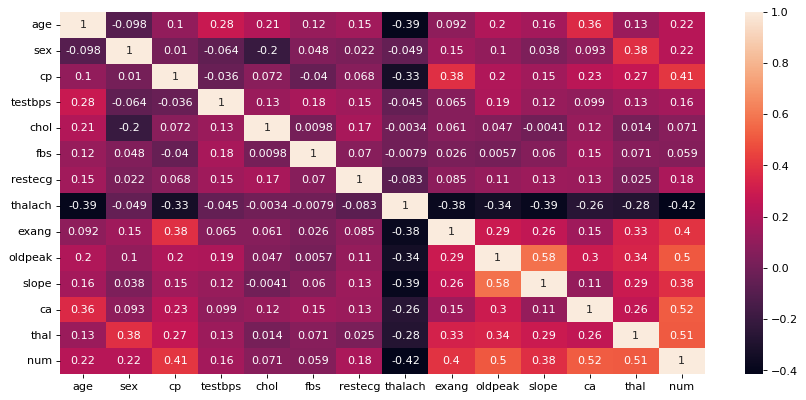

In [87]:
plt.figure(figsize=(13, 6), dpi=80)
sns.heatmap(cleveland.corr(), annot=True)
plt.show()

Now that we see all the correlation between the variables we can begin by searching if there are any outliers in the data that may affect the models we are looking to train.

[Text(0, 0.5, '')]

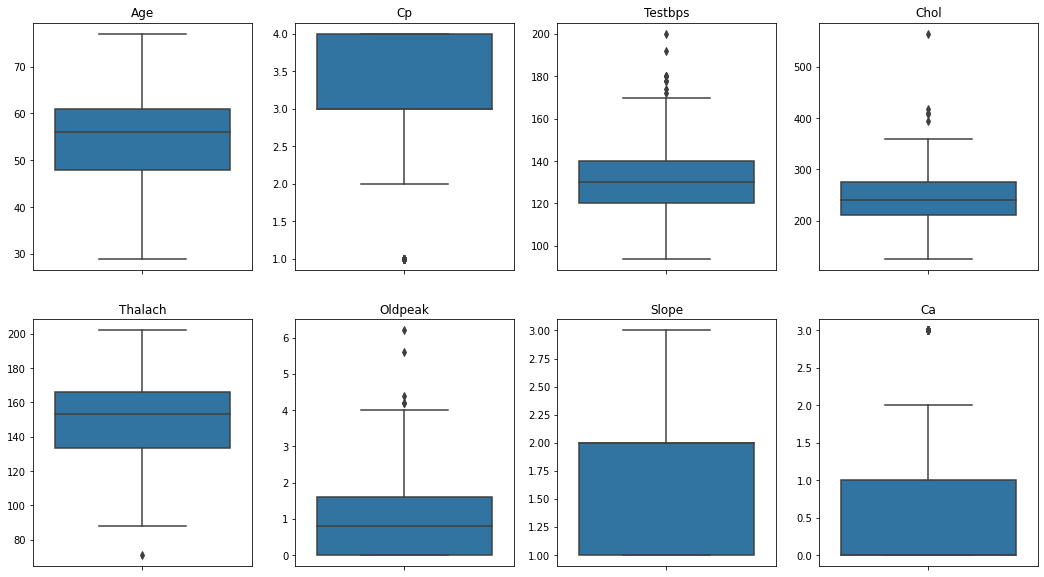

In [125]:
figure, ax = plt.subplots(2,4,figsize=(18,10))
sns.boxplot(y=cleveland.age, ax=ax[0,0])
ax[0,0].set_title('Age')
ax[0,0].set(ylabel=None)
sns.boxplot(y=cleveland.cp, ax=ax[0,1])
ax[0,1].set_title('Cp')
ax[0,1].set(ylabel=None)
sns.boxplot(y=cleveland.testbps, ax=ax[0,2])
ax[0,2].set_title('Testbps')
ax[0,2].set(ylabel=None)
sns.boxplot(y=cleveland.chol, ax=ax[0,3])
ax[0,3].set_title('Chol')
ax[0,3].set(ylabel=None)
sns.boxplot(y=cleveland.thalach, ax=ax[1,0])
ax[1,0].set_title('Thalach')
ax[1,0].set(ylabel=None)
sns.boxplot(y=cleveland.oldpeak, ax=ax[1,1])
ax[1,1].set_title('Oldpeak')
ax[1,1].set(ylabel=None)
sns.boxplot(y=cleveland.slope, ax=ax[1,2])
ax[1,2].set_title('Slope')
ax[1,2].set(ylabel=None)
sns.boxplot(y=cleveland.ca, ax=ax[1,3])
ax[1,3].set_title('Ca')
ax[1,3].set(ylabel=None)

The variables that were not included in this graph are variables that contain boolean values, as such there is no need to plot this variables to check if there are any outliers, for we can easily find those with the unique function from the pandas library.

## Linear Regresion

In [144]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [133]:
X = cleveland.iloc[:,0:13]
y = cleveland.iloc[:,13]

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

In [135]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X, y)

0.5565807754348158

In [137]:
reg.coef_

array([-1.10552171e-02,  1.99049069e-01,  2.73628694e-01,  4.09301402e-03,
       -4.30119423e-05,  1.44496838e-01,  1.19195041e-01, -6.76074137e-03,
        2.40122649e-01,  1.04726960e-01,  2.21696226e-01,  4.14141238e-01,
        1.34867244e-01])

In [136]:
reg.intercept_

-0.596221601379937

In [149]:
y_pred = reg.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 0.6576972216490776
MSE: 0.7579388836874394
RMSE: 0.8705968548573096
